# Stock Analysis

# Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf


# Fetch historical stock data for Apple Inc. (AAPL)

In [2]:

ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')


print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876106  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742668  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565201  132079200


# Prepare the data
# Use the 'Close' price to predict future 'Close' prices

In [3]:

stock_data['Date'] = stock_data.index
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Date'] = stock_data['Date'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal numbers

# Feature: Date, Target: Close Price
X = stock_data['Date'].values.reshape(-1, 1)
y = stock_data['Close'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

print(f"R-squared: {r2}")


Mean Squared Error: 6.1210370753489345
R-squared: 0.9939639075991107


# Visualize the predictions

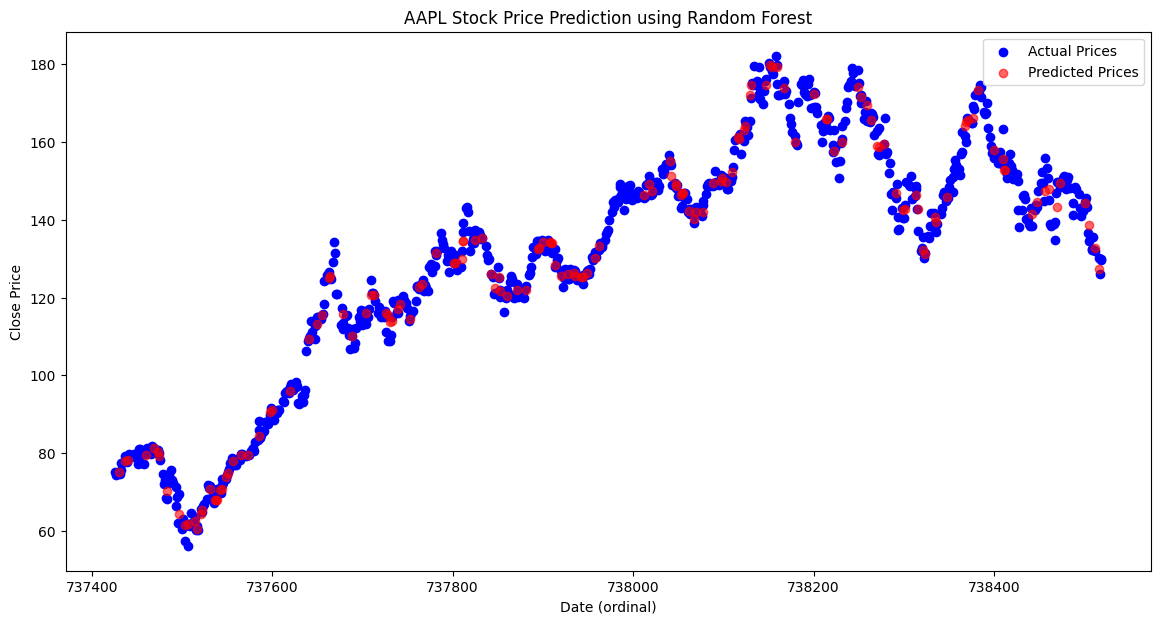

In [4]:

plt.figure(figsize=(14, 7))
plt.scatter(stock_data['Date'], stock_data['Close'], color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', alpha=0.6)
plt.title('AAPL Stock Price Prediction using Random Forest')
plt.xlabel('Date (ordinal)')
plt.ylabel('Close Price')
plt.legend()
plt.show()